In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras import layers, Input, Model
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

n_input = np.prod(x_train.shape[1:])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(len(x_train), n_input)
x_test = x_test.reshape(len(x_test), n_input)

input_img = Input(shape=(n_input,))

n = 5
indices = np.random.randint(x_test.shape[0], size=n)
x_test_sample = x_test[indices, :]

def display(model):
  reconstructed = model.predict(x_test_sample)
  plt.figure(figsize=(10, 4))
  
  for i, (x1, x2) in enumerate(zip(x_test_sample, reconstructed)):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(x2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

def processModel(model, epochs=50):
  model.fit(x_train, x_train, epochs=epochs, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
  model.evaluate(x_test,  x_test, verbose=2)

4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 1.3730 - accuracy: 0.0047 - val_loss: 1.2166 - val_accuracy: 0.0014
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 1.1099 - accuracy: 0.0027 - val_loss: 1.0427 - val_accuracy: 0.0013
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.9735 - accuracy: 0.0034 - val_loss: 0.9950 - val_accuracy: 0.0046
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.8640 - accuracy: 0.0058 - val_loss: 0.8314 - val_accuracy: 0.0090
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.7997 - accuracy: 0.0069 - val_loss: 0.7724 - val_accuracy: 0.0058
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.7285 - accuracy: 0.0067 - val_loss: 0.7006 - val_accuracy: 0.0089
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6958 - accuracy: 0.0066 - val_loss: 0.7423 - val_accuracy: 0.0020
Epoch 

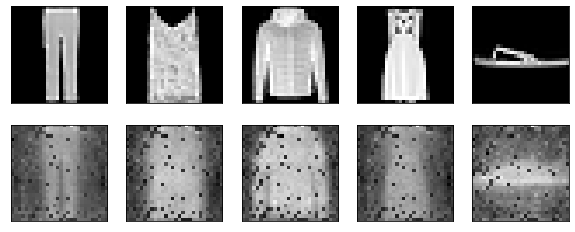

In [ ]:
# vanilla
latent_view = layers.Dense(64, activation='sigmoid')(input_img)
output_layer = layers.Dense(n_input)(latent_view)

vanilla_model = Model(input_img, output_layer)
vanilla_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

processModel(vanilla_model, epochs=10)
display(vanilla_model)

In [ ]:
encode_layer1 = layers.Dense(256, activation='relu')(input_img)
encode_layer2 = layers.Dense(128, activation='relu')(encode_layer1)
latent_view = layers.Dense(64, activation='relu')(encode_layer2)
decode_layer1 = layers.Dense(128, activation='relu')(latent_view)
decode_layer2 = layers.Dense(256, activation='relu')(decode_layer1)
output_layer = layers.Dense(n_input, activation='sigmoid')(decode_layer2)

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.3163 - accuracy: 0.0113 - val_loss: 0.2998 - val_accuracy: 0.0135
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2923 - accuracy: 0.0158 - val_loss: 0.2902 - val_accuracy: 0.0188
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2853 - accuracy: 0.0212 - val_loss: 0.2850 - val_accuracy: 0.0198
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2813 - accuracy: 0.0270 - val_loss: 0.2817 - val_accuracy: 0.0250
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2786 - accuracy: 0.0293 - val_loss: 0.2794 - val_accuracy: 0.0291
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2766 - accuracy: 0.0322 - val_loss: 0.2778 - val_accuracy: 0.0340
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2751 - accuracy: 0.0343 - val_loss: 0.2766 - val_accuracy: 0.0335

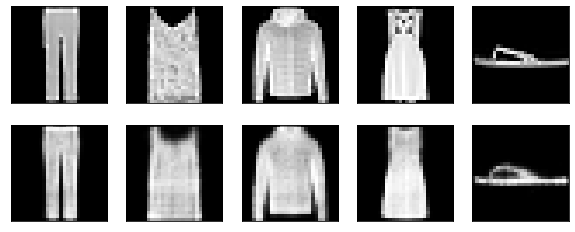

In [ ]:
# deep with 'adam' optimizer
deep_model = Model(input_img, output_layer)
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

processModel(deep_model, epochs=10)
display(deep_model)

Epoch 1/10
469/469 [==============================] - 12s 21ms/step - loss: 0.6939 - accuracy: 0.0014 - val_loss: 0.6938 - val_accuracy: 0.0012
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.6937 - accuracy: 0.0014 - val_loss: 0.6936 - val_accuracy: 0.0013
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.6935 - accuracy: 0.0014 - val_loss: 0.6934 - val_accuracy: 0.0013
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.6933 - accuracy: 0.0015 - val_loss: 0.6933 - val_accuracy: 0.0013
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.6932 - accuracy: 0.0015 - val_loss: 0.6931 - val_accuracy: 0.0014
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.6930 - accuracy: 0.0015 - val_loss: 0.6930 - val_accuracy: 0.0014
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.6929 - accuracy: 0.0016 - val_loss: 0.6928 - val_accuracy: 0.001

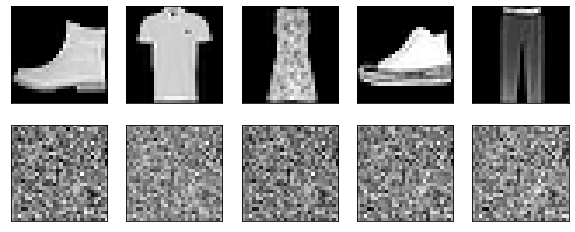

In [ ]:
# deep with 'adadelta' optimizer
deep_model = Model(input_img, output_layer)
deep_model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

processModel(deep_model, epochs=10)
display(deep_model)